In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
import pandas as pd
import seaborn as sns




In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
print(f'Training sample:\n {train_images[0]}\n')
print(f'Training label:\n {train_labels[0]}\n')



Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [7]:
train_images[0].shape, train_labels[0].shape

((28, 28), ())

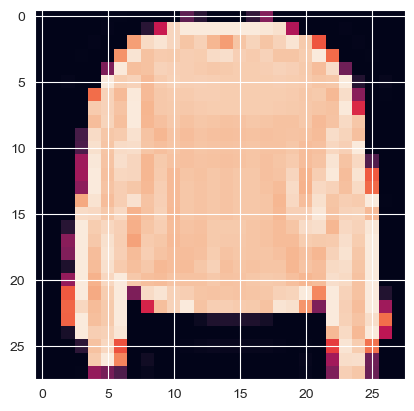

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[7])

In [12]:
train_labels[0]

9

In [13]:
# Create a small list so we can index onto our training labels so they're human readable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [15]:
# Plot an example image and its label
def plot_image(index_of_choice):
    plt.imshow(train_images[index_of_choice ], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index_of_choice ]])


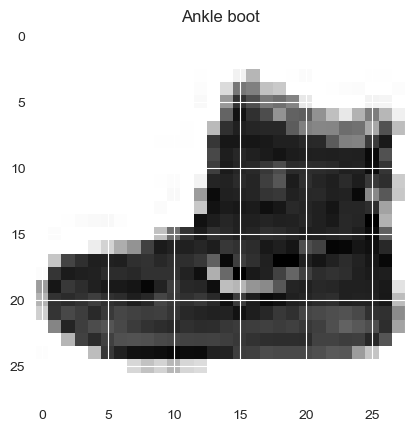

In [18]:
plot_image(0)

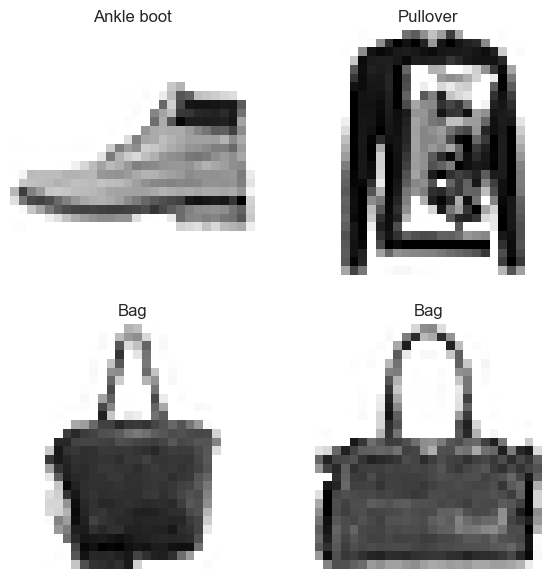

In [29]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_images)))
    plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


# Building a multi-class classification model

For our multi-class classification problem, we can use a similar architecture to our binary classifiers, however, we'r going to have to tweak a few things.

- Input shape = 28x28 (the shape of our images)
- Output shape = 10 (the number of classes we're trying to predict)
- Loss function = tf.keras.losses.CategoricalCrossentropy()
- Output layer activation = softmax (because our problem is multi-class classification)

In [35]:
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_1.fit(train_images,
                               train_labels,
                               epochs=10,
                               validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 391us/step - loss: 2.3572 - accuracy: 0.0984 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 338us/step - loss: 2.2865 - accuracy: 0.1085 - val_loss: 2.2739 - val_accuracy: 0.1198
Epoch 3/10
1875/1875 [==============================] - 1s 336us/step - loss: 2.2382 - accuracy: 0.1318 - val_loss: 2.2164 - val_accuracy: 0.1378
Epoch 4/10
1875/1875 [==============================] - 1s 338us/step - loss: 1.9510 - accuracy: 0.1983 - val_loss: 1.7726 - val_accuracy: 0.2617
Epoch 5/10
1875/1875 [==============================] - 1s 363us/step - loss: 1.7101 - accuracy: 0.2692 - val_loss: 1.6665 - val_accuracy: 0.2796
Epoch 6/10
1875/1875 [==============================] - 1s 358us/step - loss: 1.6498 - accuracy: 0.2837 - val_loss: 1.6825 - val_accuracy: 0.2748
Epoch 7/10
1875/1875 [==============================] - 1s 347us/step - loss: 1.6247 - accuracy: 0.2866 - val_loss: 1.6114 -

In [38]:
train_images.min(), train_images.max()

(0, 255)

In [39]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [40]:
tf.random.set_seed(42)

# 1. Create the model
Model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
Model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
norm_history = Model_2.fit(train_images_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_images_norm, test_labels))




Epoch 1/10
1875/1875 [==============================] - 1s 511us/step - loss: 1.1281 - accuracy: 0.5907 - val_loss: 0.8229 - val_accuracy: 0.7039
Epoch 2/10
1875/1875 [==============================] - 1s 348us/step - loss: 0.7288 - accuracy: 0.7367 - val_loss: 0.6954 - val_accuracy: 0.7520
Epoch 3/10
1875/1875 [==============================] - 1s 337us/step - loss: 0.6445 - accuracy: 0.7611 - val_loss: 0.6423 - val_accuracy: 0.7559
Epoch 4/10
1875/1875 [==============================] - 1s 330us/step - loss: 0.6151 - accuracy: 0.7710 - val_loss: 0.6252 - val_accuracy: 0.7674
Epoch 5/10
1875/1875 [==============================] - 1s 336us/step - loss: 0.5987 - accuracy: 0.7750 - val_loss: 0.6330 - val_accuracy: 0.7710
Epoch 6/10
1875/1875 [==============================] - 1s 449us/step - loss: 0.5865 - accuracy: 0.7791 - val_loss: 0.6119 - val_accuracy: 0.7772
Epoch 7/10
1875/1875 [==============================] - 1s 396us/step - loss: 0.5757 - accuracy: 0.7872 - val_loss: 0.6371 -

<AxesSubplot: title={'center': 'Normalized data'}>

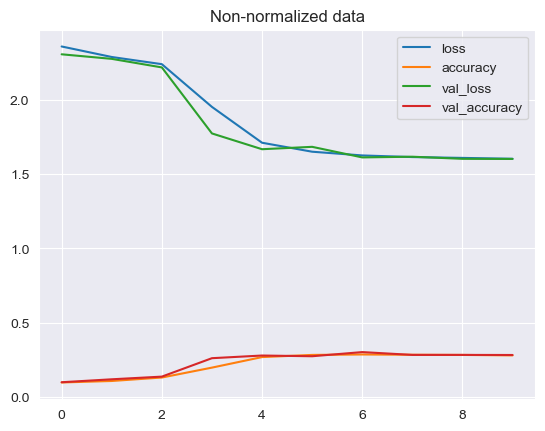

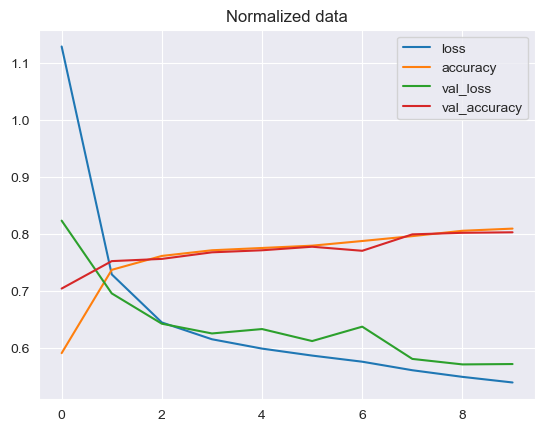

In [41]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")


In [42]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))

model_3.fit(train_images_norm,
            train_labels,
            epochs=40,
            validation_data=(test_images_norm, test_labels),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 1s 384us/step - loss: 1.1684 - accuracy: 0.5666 - val_loss: 0.6983 - val_accuracy: 0.7528 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 339us/step - loss: 0.6124 - accuracy: 0.7842 - val_loss: 0.6435 - val_accuracy: 0.7813 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 463us/step - loss: 0.5599 - accuracy: 0.8043 - val_loss: 0.5820 - val_accuracy: 0.7985 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 455us/step - loss: 0.5374 - accuracy: 0.8149 - val_loss: 0.5661 - val_accuracy: 0.8030 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 344us/step - loss: 0.5263 - accuracy: 0.8167 - val_loss: 0.5630 - val_accuracy: 0.8065 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 347us/step - loss: 0.5167 - accuracy: 0.8201 - val_loss: 0.5799 - val_accuracy: 0.7988 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Learning rate vs. Loss')

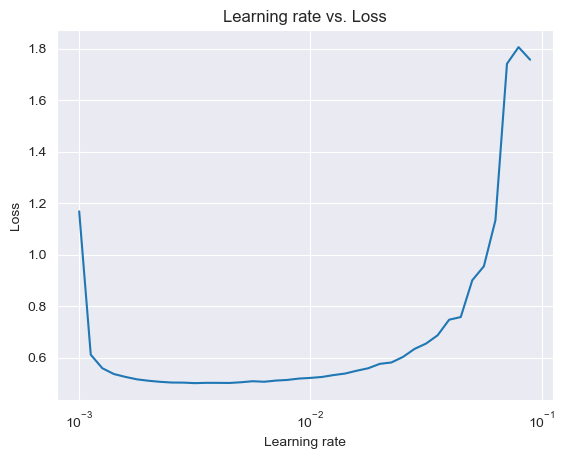

In [43]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, model_3.history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")



In [45]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


model_4.fit(train_images_norm,
            train_labels,
            epochs=20,
            validation_data=(test_images_norm, test_labels)
            )

Epoch 1/20
1875/1875 [==============================] - 1s 377us/step - loss: 1.4278 - accuracy: 0.4364 - val_loss: 1.1591 - val_accuracy: 0.5159
Epoch 2/20
1875/1875 [==============================] - 1s 341us/step - loss: 1.0677 - accuracy: 0.5453 - val_loss: 1.0393 - val_accuracy: 0.5605
Epoch 3/20
1875/1875 [==============================] - 1s 330us/step - loss: 0.9826 - accuracy: 0.5864 - val_loss: 0.9735 - val_accuracy: 0.5925
Epoch 4/20
1875/1875 [==============================] - 1s 329us/step - loss: 0.9293 - accuracy: 0.6104 - val_loss: 0.9198 - val_accuracy: 0.6117
Epoch 5/20
1875/1875 [==============================] - 1s 338us/step - loss: 0.8971 - accuracy: 0.6241 - val_loss: 0.9158 - val_accuracy: 0.6228
Epoch 6/20
1875/1875 [==============================] - 1s 327us/step - loss: 0.8745 - accuracy: 0.6346 - val_loss: 0.8814 - val_accuracy: 0.6392
Epoch 7/20
1875/1875 [==============================] - 1s 324us/step - loss: 0.8615 - accuracy: 0.6465 - val_loss: 0.8940 -

In [46]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None,figsize=(10,10), text_size=15):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)




In [49]:
y_probs = model_4.predict(test_images_norm)

y_probs[:5]

313/313 [==============================] - 0s 327us/step


array([[6.5030699e-06, 1.2779302e-12, 5.1508925e-07, 7.9677154e-09,
        2.9735154e-09, 6.1552044e-02, 2.2156430e-06, 3.8097227e-01,
        1.9160315e-04, 5.5727488e-01],
       [5.6554734e-05, 5.2643463e-07, 3.7019131e-01, 7.6996765e-09,
        3.5752397e-02, 6.4927705e-14, 4.1362464e-02, 8.3069835e-09,
        5.5263674e-01, 3.7378679e-26],
       [1.1264356e-06, 9.9521905e-01, 3.4900952e-06, 2.5951207e-04,
        4.5055943e-03, 1.9028109e-30, 1.1159490e-05, 3.3364416e-31,
        2.2071730e-15, 0.0000000e+00],
       [1.9953386e-06, 9.9725145e-01, 5.5377126e-07, 1.9182152e-03,
        8.2379940e-04, 7.9832486e-29, 3.9744618e-06, 5.2474933e-31,
        2.6166039e-16, 0.0000000e+00],
       [3.4773517e-01, 5.0577294e-04, 1.4376922e-01, 1.7866453e-02,
        2.9685386e-02, 5.0542552e-05, 4.1728261e-01, 1.1658614e-05,
        4.3093156e-02, 4.4189256e-11]], dtype=float32)

In [52]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.5030699e-06, 1.2779302e-12, 5.1508925e-07, 7.9677154e-09,
        2.9735154e-09, 6.1552044e-02, 2.2156430e-06, 3.8097227e-01,
        1.9160315e-04, 5.5727488e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [53]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]



array([9, 8, 1, 1, 6, 1, 2, 2, 5, 7])

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true= test_labels,
                 y_pred= y_preds)


array([[612,   4,   7,  86,  10,  14, 225,   0,  42,   0],
       [  9, 913,   3,  42,  18,   1,  12,   0,   2,   0],
       [ 33,   3, 500,   7, 172,   0, 222,   1,  62,   0],
       [152,  44,   2, 697,  20,   9,  71,   0,   5,   0],
       [ 16,  18, 251,   9, 566,   0, 125,   0,  15,   0],
       [  5,   0,   0,   0,   0, 782,   0, 114,  13,  86],
       [174,   5, 194,  31, 118,  10, 389,   1,  78,   0],
       [  0,   0,   0,   0,   0,  36,   0, 912,   2,  50],
       [ 17,   0,  10,   4,   4,  11,  12,  13, 927,   2],
       [  0,   0,   0,   0,   0,  25,   0,  59,   0, 916]])

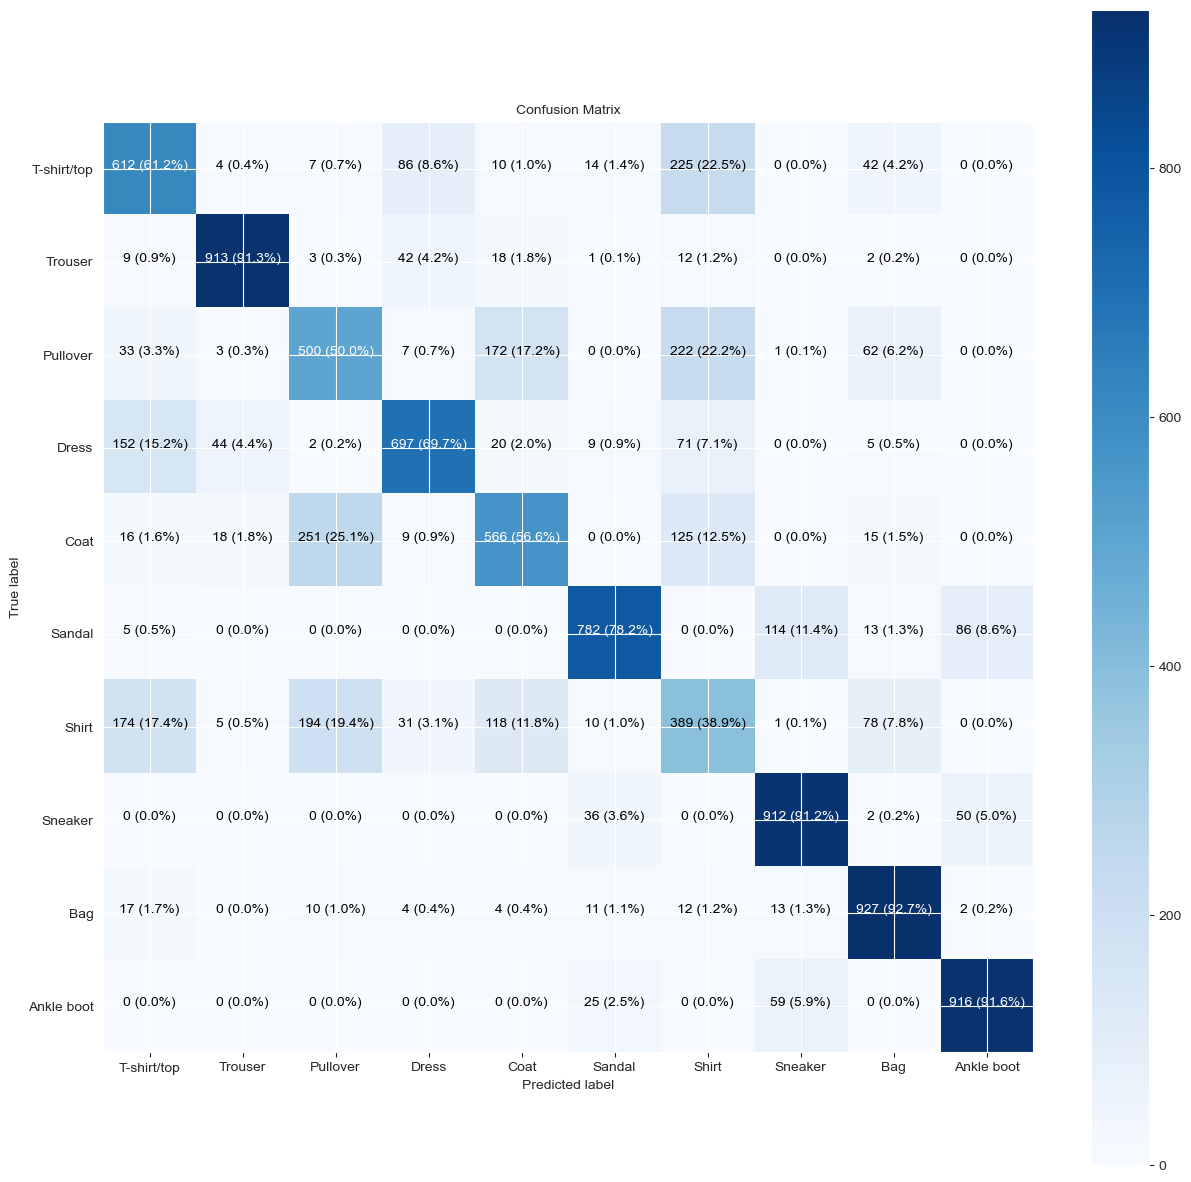

In [55]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [57]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    plt.imshow(target_image, cmap=plt.cm.binary)
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100 * tf.reduce_max(pred_probs),
                                                    true_label),
               color=color)


1/1 [==============================] - 0s 9ms/step


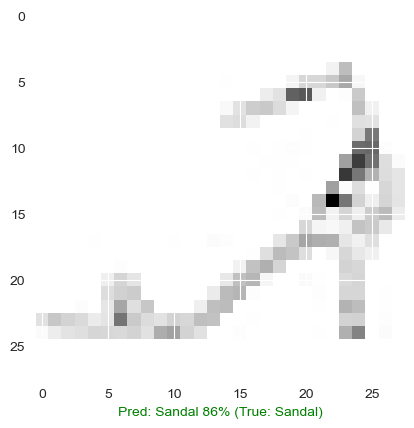

In [137]:
plot_random_image(model=model_4,
                  images=test_images_norm,
                  true_labels=test_labels,
                  classes=class_names)